In [2]:
import matplotlib.pyplot as plt
import sounddevice as sd
import numpy as np
from mijngeluid import fft_partitioned

sd.query_devices()

  0 Hue Sync Audio, Core Audio (4 in, 2 out)
> 1 MacBook Air Microphone, Core Audio (1 in, 0 out)
< 2 MacBook Air Speakers, Core Audio (0 in, 2 out)

In [129]:
fs = 96000
duration = 8
arr = sd.rec(int((duration * fs)), samplerate=fs, channels=1, dtype='float32', device=1)

sd.wait()
arr.shape

(768000, 1)

In [749]:
myrecording = sd.play(arr)

In [130]:
df = fft_partitioned(arr[:,0], fs, duration, t_bin=1e-2) # t_bin is de bin grootte in seconden
df

,t,f,I
0,0.01,0.000000,0.000561
1,0.01,100.208768,0.001447
2,0.01,200.417537,0.000976
3,0.01,300.626305,0.000908
4,0.01,400.835073,0.000039
...,...,...,...
475,8.00,47599.164927,0.000002
476,8.00,47699.373695,0.000002
477,8.00,47799.582463,0.000002
478,8.00,47899.791232,0.000002


(0.0, 1000.0)

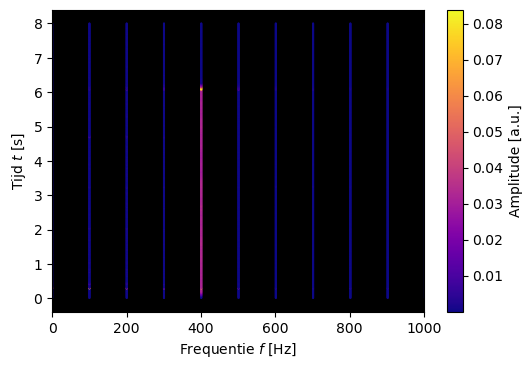

In [134]:
dfx = df[df['f'].between(100, 100000)]
plt.figure(dpi=100)
ax = plt.axes()
ax.set_facecolor("black") # voor het gebruikersgemak (verwijder comments en kijk wat het doet als functie van t_bin)

plt.scatter(df.f,df.t, c=df.I, cmap='plasma', marker='.' ,s=1)
plt.colorbar(label="Amplitude [a.u.]")
plt.xlabel("Frequentie $f$ [Hz]")
plt.ylabel("Tijd $t$ [s]")
#plt.xscale('log')
plt.xlim([0, 1000])

(80.0, 115.0)

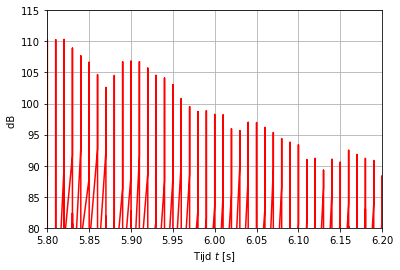

In [127]:

plt.plot(df.t, 10 * np.log10(df.I/10**-12), 'r-')
plt.grid()
#plt.yscale("log")
#plt.xscale("log")
plt.xlabel(r"Tijd $t$ [s]")
plt.ylabel(r"dB ")
plt.xlim(5.8, 6.2)
plt.ylim(80, 115)

Text(0, 0.5, 'Intensiteit ')

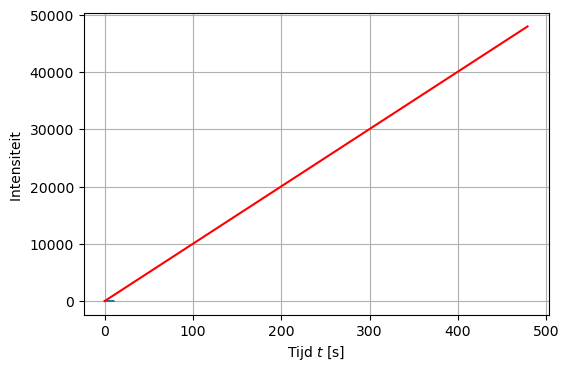

In [114]:


plt.figure(dpi=100)
plt.plot(df.t,df.I, df.f, 'r')
plt.grid()
#plt.yscale("log")
#plt.xscale("log")
plt.xlabel(r"Tijd $t$ [s]")
plt.ylabel(r"Intensiteit ")